In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from sklearn.datasets import load_iris

In [7]:
# Import libraries
import numpy as np  # Import NumPy for array operations
from sklearn.datasets import load_iris
import scipy.stats as stats  # Import all functions from scipy.stats with alias

# Load the Iris dataset
iris = load_iris()

# Access data and target variables
data = iris.data  # This contains features like sepal length, sepal width, etc.
target = iris.target  # This contains the flower species (0, 1, or 2)

# Analyze features (e.g., sepal length)
feature_1 = data[:, 0]  # Select the first feature (sepal length)

# Handle potential missing values (NaNs) before calculating statistics
if np.isnan(feature_1).any():  # Check for any NaNs
    print("Warning: Missing values (NaNs) detected in feature_1.")
    feature_1 = np.nan_to_num(feature_1)  # Replace NaNs with a numerical value (e.g., np.nanmean)


print("Summary of features:")
print(stats.describe(data))

Summary of features:
DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))


In [8]:
# Convert data and target to pandas DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['species'])  # Assign a name to the target column

# Combine features and target for descriptive statistics
df = pd.concat([data, target], axis=1)  # Concatenate along columns

# Get descriptive statistics
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


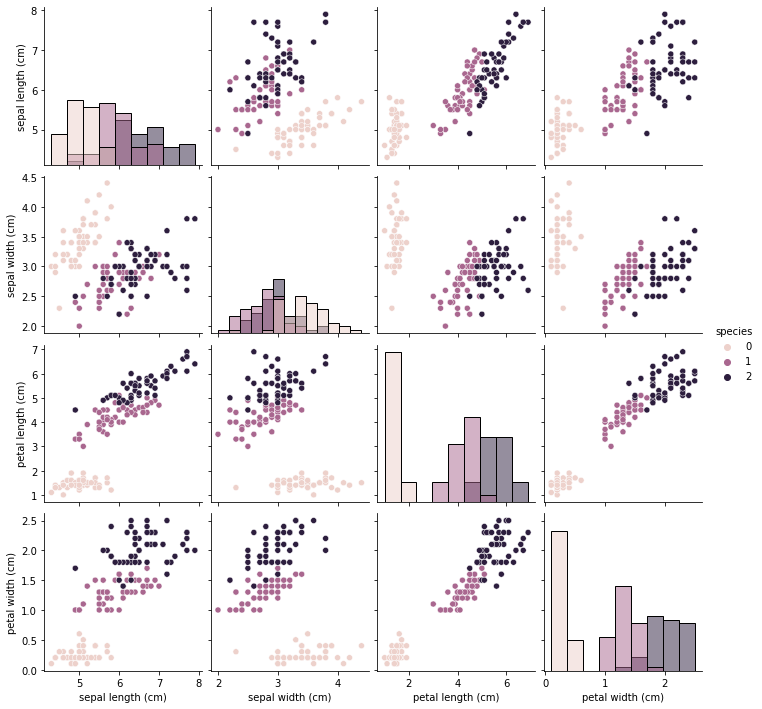

In [12]:
# Import libraries
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the data
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Series(iris.target, name='species')  # Convert target to a Series with name

# Combine data and target
df = pd.concat([data, target], axis=1)

# Create a pairplot
sns.pairplot(df, hue='species', diag_kind='hist')  # 'hist' on diagonal shows histograms for each feature


In [ ]:
The Iris flower dataset allows us to explore central tendency (mean and median) and distribution of features (sepal and petal dimensions) for different flower species.
We used describe to understand the overall features of our data like mean sepal length is 5.84,sepal width is 3.05 and petal lenaght is 3.75
While not shown here, histograms could further reveal if features follow a normal distribution or have a skew. 
we have colored them in different color to higlight the difference in the graph
These analyses provide insights into the characteristics of the Iris flowers and potential relationships between measurements and flower types.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Load the Iris dataset
iris = load_iris()

# Convert data and target to pandas DataFrames (optional)
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Series(iris.target, name='species')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Create a MultinomialNB classifier
clf = MultinomialNB()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model performance (optional)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9000


In [6]:
# Access feature log probabilities (log likelihoods) for each class
feature_log_probs = clf.feature_log_prob_

# Access class log priors (log prior probabilities)
class_log_priors = clf.class_log_prior_

# Print feature log probabilities for each class
for i, class_name in enumerate(iris.target_names):
    print(f"Class: {class_name}")
    for j, feature_name in enumerate(data.columns):
        print(f"Feature: {feature_name}, Log Probability: {feature_log_probs[i][j]}")
    print()

# Print class log priors
print("Class Log Priors:")
for i, class_name in enumerate(iris.target_names):
    print(f"Class: {class_name}, Log Prior: {class_log_priors[i]}")

Class: setosa
Feature: sepal length (cm), Log Probability: -0.713624027765289
Feature: sepal width (cm), Log Probability: -1.0797438043637273
Feature: petal length (cm), Log Probability: -1.9373994593874047
Feature: petal width (cm), Log Probability: -3.6353907691629503

Class: versicolor
Feature: sepal length (cm), Log Probability: -0.8814690280961219
Feature: sepal width (cm), Log Probability: -1.6359591844466435
Feature: petal length (cm), Log Probability: -1.2131926067027266
Feature: petal width (cm), Log Probability: -2.366444035444233

Class: virginica
Feature: sepal length (cm), Log Probability: -0.959592838364812
Feature: sepal width (cm), Log Probability: -1.7443821882170445
Feature: petal length (cm), Log Probability: -1.127322394550541
Feature: petal width (cm), Log Probability: -2.134540875042533

Class Log Priors:
Class: setosa, Log Prior: -1.0986122886681096
Class: versicolor, Log Prior: -1.0739196760777379
Class: virginica, Log Prior: -1.1239300966523995


In [ ]:
We first prepare and train a Multinomial Naive Bayes classifier on the Iris dataset, splitting it into training and testing sets for evaluation.
After training the model, we make predictions on the test set and assess its performance using accuracy score.
Then, we delve into interpreting the model's behavior by exploring learned probabilities for each class and feature, along with prior probabilities.
By accessing attributes such as feature_log_prob_ and class_log_prior_, we gain insights into how the model utilizes probabilities to make predictions, shedding light on its decision-making process.

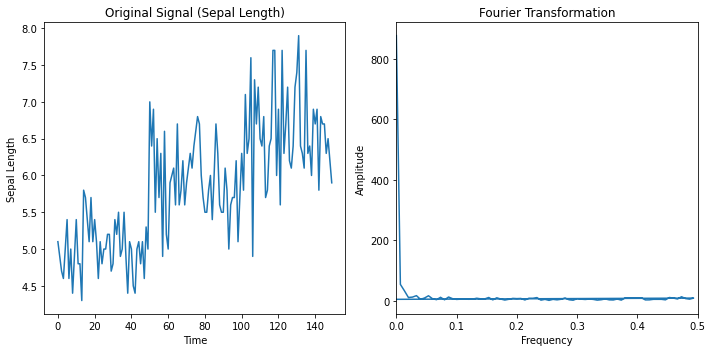

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
sepal_length = iris.data[:, 0]  # Extract sepal length feature

# Generate synthetic time-series data
time = np.arange(len(sepal_length))
signal = sepal_length  # Using sepal length as our synthetic signal

# Perform Fourier transformation
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal))

# Plot the original signal and its Fourier transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, signal)
plt.title('Original Signal (Sepal Length)')
plt.xlabel('Time')
plt.ylabel('Sepal Length')

plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(fft_result))
plt.title('Fourier Transformation')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)  # Show only positive frequencies
plt.tight_layout()
plt.show()

In [ ]:
Fourier transformation applied to synthetic time-series data generated from the sepal length feature of the Iris dataset.
After generating the signal, Fourier transformation is performed to analyze its frequency components.
The resulting plot illustrates the original signal and its frequency spectrum, providing insights into the periodic patterns present in the data.

In [ ]:
SUMMARY OF ASSIGNMENT-2
The Iris flower dataset serves as a valuable tool for exploring central tendency and distribution of features across different flower species. 
Utilizing descriptive statistics like mean and median, we gain insights into the dimensions of sepals and petals, distinguishing characteristics among species.
By visualizing histograms in distinct colors, we highlight variations in the dataset and assess normality. Additionally, we apply machine learning techniques, specifically Multinomial Naive Bayes classification, to predict flower types based on features.
Interpreting the model's behavior reveals how probabilities influence predictions, enhancing our understanding of decision-making processes. 
Furthermore, Fourier transformation unveils periodic patterns in synthetic time-series data derived from sepal length, providing deeper insights into the dataset's underlying structure and dynamics. 
These analyses collectively deepen our understanding of Iris flowers and uncover potential relationships between measurements and species.